# Describe the elevation of the star during the night

In [14]:
import urllib
import IPython.display
import numpy as np
import astropy

In [15]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rc_file("../templates/matplotlibrc")

In [16]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import Angle
from astropy.table import Table
from astropy.coordinates import Angle
from astropy.time import Time, TimezoneInfo

In [17]:
from datetime import datetime
from pytz import timezone
import pytz
import pandas as pd

In [18]:
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

In [19]:
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

## Define Coordinates Systems

In [20]:
hd_163466_starloc=astropy.coordinates.SkyCoord.from_name('HD163466')

In [21]:
from astropy.coordinates import Longitude, Latitude
NOFS_Longitude=Longitude(u'-111°44′25″') 
NOFS_Latitude=Latitude(u'35°11′03″')
NOFS_Height=2.273*u.m 

In [22]:
#definition of the location to astropy
NOFS_location = astropy.coordinates.EarthLocation(lat=NOFS_Latitude, lon=NOFS_Longitude, height=NOFS_Height)

In [23]:
from astropy.coordinates import get_sun
utcoffset=utcoffset = -7*u.hour  # Mountain  Daylight Time
midnight = Time('2016-5-10 00:00:00') - utcoffset
delta_midnight = np.linspace(-12, 12, 1000)*u.hour

times_May09_to_10 = midnight + delta_midnight
frame_May09_to_10 = AltAz(obstime=times_May09_to_10, location=NOFS_location)
sunaltazs_May09_to_10 = get_sun(times_May09_to_10).transform_to(frame_May09_to_10)

In [24]:
hd_163466_altazs_May09_to_10 = hd_163466_starloc.transform_to(frame_May09_to_10 )

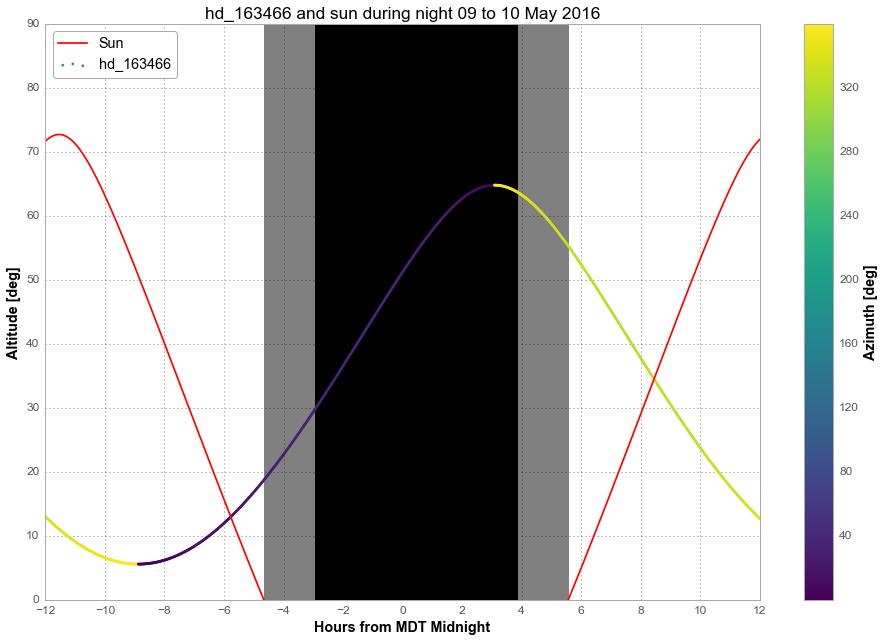

In [25]:
plt.figure(figsize=(16.,10.))
plt.plot(delta_midnight, sunaltazs_May09_to_10.alt, color='r', label='Sun')
plt.scatter(delta_midnight, hd_163466_altazs_May09_to_10.alt,
            c=hd_163466_altazs_May09_to_10.az, label='hd_163466', lw=0, s=8,
            cmap='viridis')

# plot astronomical crepuscule
plt.fill_between(delta_midnight.to('hr').value, 0, 90,
                 sunaltazs_May09_to_10.alt < -0*u.deg, color='0.5', zorder=0)
#plot astronomical night
plt.fill_between(delta_midnight.to('hr').value, 0, 90,
                 sunaltazs_May09_to_10.alt < -18*u.deg, color='k', zorder=0)
plt.colorbar().set_label('Azimuth [deg]')
plt.legend(loc='upper left')
plt.xlim(-12, 12)
plt.xticks(np.arange(13)*2 -12)
plt.ylim(0, 90)
plt.title('hd_163466 and sun during night 09 to 10 May 2016')
plt.xlabel('Hours from MDT Midnight')
plt.ylabel('Altitude [deg]')
plt.show()

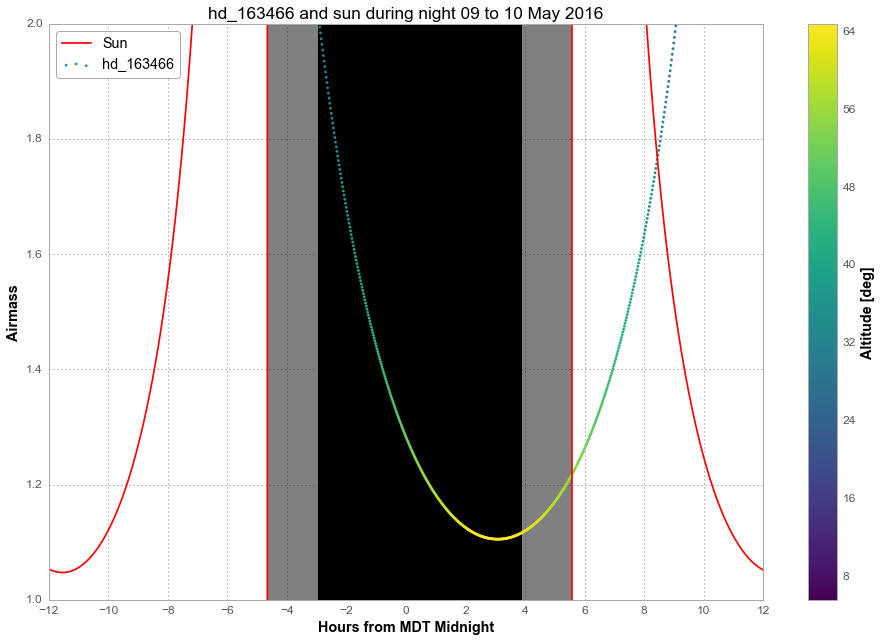

In [26]:
plt.figure(figsize=(16.,10.))
plt.plot(delta_midnight, sunaltazs_May09_to_10.secz, color='r', label='Sun')
plt.scatter(delta_midnight, hd_163466_altazs_May09_to_10.secz,
            c=hd_163466_altazs_May09_to_10.alt, label='hd_163466', lw=0, s=8,
            cmap='viridis')

# plot astronomical twillight
plt.fill_between(delta_midnight.to('hr').value, 0, 2.,
                 sunaltazs_May09_to_10.alt < -0*u.deg, color='0.5', zorder=0)
#plot astronomical night
plt.fill_between(delta_midnight.to('hr').value, 0, 2.,
                 sunaltazs_May09_to_10.alt < -18*u.deg, color='k', zorder=0)
plt.colorbar().set_label('Altitude [deg]')
plt.legend(loc='upper left')
plt.xlim(-12, 12)
plt.xticks(np.arange(13)*2 -12)
plt.ylim(1., 2.)
plt.title('hd_163466 and sun during night 09 to 10 May 2016')
plt.xlabel('Hours from MDT Midnight')
plt.ylabel('Airmass')
plt.show()

## Read the logbook table

In [27]:
tablefile_HD163466_PSF='HD163466_y3_1-10_TablePSF_night20160509.fits'
tablefile_HD163466_PSF_with_AM='HD163466_y3_1-10_TablePSF_night20160509_withAM.fits'

In [28]:
t = Table.read(tablefile_HD163466_PSF)

In [29]:
t.show_in_notebook()

num,file,time,exposure,nbstars,prfx,pfry,sig_prfx,sig_prfy,sigmax,sigmay
1,AssScImHD163466_y3_1.fits,2016-05-10T08:31:46.221,1.0,7,3.14462939981,3.41466663301,0.0624903435569,0.0399877500438,2.96853015342,3.22344530156
2,AssScImHD163466_y3_2.fits,2016-05-10T08:33:17.773,5.0,23,3.23590764548,3.67168661807,0.210812621801,0.313203469327,3.05469681733,3.46607216746
3,AssScImHD163466_y3_3.fits,2016-05-10T08:33:27.174,5.0,30,3.28439425917,3.44808452428,0.153086049741,0.109240066938,3.10046818065,3.25499179092
4,AssScImHD163466_y3_4.fits,2016-05-10T08:33:36.166,5.0,29,3.07852576115,3.39865028239,0.0743265241544,0.182716405574,2.90612831853,3.20832586658
5,AssScImHD163466_y3_5.fits,2016-05-10T08:38:53.776,3.0,9,5.01067679435,5.12760526598,0.431963018433,0.931127413941,4.73007889387,4.84045937108
6,AssScImHD163466_y3_6.fits,2016-05-10T08:39:35.943,3.0,4,3.66881377389,3.71438578859,0.125757386795,0.0576096104765,3.46336020256,3.50638018443
7,AssScImHD163466_y3_7.fits,2016-05-10T08:40:17.637,3.0,15,2.62049631174,2.75934903687,0.053654463766,0.0477390482732,2.47374851828,2.60482549081
8,AssScImHD163466_y3_8.fits,2016-05-10T08:41:40.854,3.0,12,3.02620244552,2.97225160347,0.0890701171525,0.163930894688,2.85673510857,2.80580551367
9,AssScImHD163466_y3_9.fits,2016-05-10T08:41:47.875,3.0,15,2.85053312944,2.90077455,0.076245483463,0.038651577062,2.69090327419,2.7383311752
10,AssScImHD163466_y3_10.fits,2016-05-10T08:41:54.822,3.0,20,2.74595205679,2.86321797679,0.101194165365,0.0711165660995,2.59217874161,2.70287777009


### retrieve the time and the number from the table

In [30]:
all_date_str=t['time']

In [31]:
all_num=t['num']

In [32]:
NB_NUMBERS=all_num.shape[0]

In [33]:
series_time=Time(all_date_str)

In [34]:
NB_EXPOSURES=series_time.shape[0]

### Do the required transformation to get the airmass

In [35]:
all_frame_May09_to_10 = AltAz(obstime=series_time, location=NOFS_location)

- frame for observed object

In [36]:
all_hd_163466_altazs_May09_to_10 = hd_163466_starloc.transform_to(all_frame_May09_to_10 )

- calculate azimuth

In [37]:
all_hd_163466_altazs_May09_to_10_az=all_hd_163466_altazs_May09_to_10.az

- calculate elevation

In [38]:
all_hd_163466_altazs_May09_to_10_alt=all_hd_163466_altazs_May09_to_10.alt

- Calculate airmass

In [39]:
all_hd_163466_altazs_May09_to_10_airmass=all_hd_163466_altazs_May09_to_10.secz

- Create the columns

In [40]:
all_hd_163466_altazs_May09_to_10_az

<Longitude [ 23.58061377, 23.28974345, 23.25966456, 23.23085752,
             22.19029354, 22.04877425, 21.90806668, 21.62492454,
             21.60089558, 21.57709841] deg>

In [41]:
t['azimuth']=all_hd_163466_altazs_May09_to_10_az

In [42]:
all_hd_163466_altazs_May09_to_10_alt

<Latitude [ 60.64415299, 60.76848919, 60.78117394, 60.79329234,
            61.21207224, 61.26629003, 61.31957463, 61.42495069,
            61.43378143, 61.4425099 ] deg>

In [43]:
t['altitude']=all_hd_163466_altazs_May09_to_10_alt

In [44]:
all_hd_163466_altazs_May09_to_10_airmass

<Quantity [ 1.14732601, 1.14593002, 1.14578809, 1.14565259, 1.14102086,
            1.14042839, 1.13984771, 1.138704  , 1.13860843, 1.13851401]>

In [45]:
t['airmass']=all_hd_163466_altazs_May09_to_10_airmass

In [46]:
t.show_in_notebook()

num,file,time,exposure,nbstars,prfx,pfry,sig_prfx,sig_prfy,sigmax,sigmay,azimuth,altitude,airmass
,,,,,,,,,,,deg,deg,
1,AssScImHD163466_y3_1.fits,2016-05-10T08:31:46.221,1.0,7,3.14462939981,3.41466663301,0.0624903435569,0.0399877500438,2.96853015342,3.22344530156,23.5806137675,60.644152987,1.14732601019
2,AssScImHD163466_y3_2.fits,2016-05-10T08:33:17.773,5.0,23,3.23590764548,3.67168661807,0.210812621801,0.313203469327,3.05469681733,3.46607216746,23.2897434465,60.7684891938,1.1459300185
3,AssScImHD163466_y3_3.fits,2016-05-10T08:33:27.174,5.0,30,3.28439425917,3.44808452428,0.153086049741,0.109240066938,3.10046818065,3.25499179092,23.2596645573,60.7811739444,1.14578809387
4,AssScImHD163466_y3_4.fits,2016-05-10T08:33:36.166,5.0,29,3.07852576115,3.39865028239,0.0743265241544,0.182716405574,2.90612831853,3.20832586658,23.230857516,60.7932923357,1.14565259128
5,AssScImHD163466_y3_5.fits,2016-05-10T08:38:53.776,3.0,9,5.01067679435,5.12760526598,0.431963018433,0.931127413941,4.73007889387,4.84045937108,22.1902935409,61.212072237,1.14102086053
6,AssScImHD163466_y3_6.fits,2016-05-10T08:39:35.943,3.0,4,3.66881377389,3.71438578859,0.125757386795,0.0576096104765,3.46336020256,3.50638018443,22.0487742545,61.2662900264,1.14042839219
7,AssScImHD163466_y3_7.fits,2016-05-10T08:40:17.637,3.0,15,2.62049631174,2.75934903687,0.053654463766,0.0477390482732,2.47374851828,2.60482549081,21.9080666791,61.3195746269,1.13984771447
8,AssScImHD163466_y3_8.fits,2016-05-10T08:41:40.854,3.0,12,3.02620244552,2.97225160347,0.0890701171525,0.163930894688,2.85673510857,2.80580551367,21.6249245351,61.4249506859,1.13870399801
9,AssScImHD163466_y3_9.fits,2016-05-10T08:41:47.875,3.0,15,2.85053312944,2.90077455,0.076245483463,0.038651577062,2.69090327419,2.7383311752,21.6008955793,61.4337814346,1.13860843107


In [47]:
t.write(tablefile_HD163466_PSF_with_AM,format='fits')